## Importing Required Libraries

In this step, I imported all the necessary Python libraries for data analysis and visualization.  
- `pandas` and `numpy` are used for data manipulation and numerical operations.
- `matplotlib` and `seaborn` are used for creating insightful visualizations.
- `glob` and `os` help in file handling and directory navigation.

In [6]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

##  Data Loading: Aggregating All 2020 TransBorder Freight Data

Here, I load all CSV files from the 2020 data directory, combining them into a single DataFrame for comprehensive analysis.
This ensures that our analysis covers the entire year and all available records, providing a solid foundation for answering business questions.

In [7]:
# Cell 2: Load all 2020 CSVs
base_dir = '../2020/'
csv_files = glob.glob(os.path.join(base_dir, '**', '*.csv'), recursive=True)
print(f"Found {len(csv_files)} CSV files.")

dfs = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df['Source_File'] = os.path.relpath(file, base_dir)
        dfs.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")

data = pd.concat(dfs, ignore_index=True)
print(f"Combined data shape: {data.shape}")
data.head()


Found 54 CSV files.


C:\Users\USER\AppData\Local\Temp\ipykernel_12780\430122044.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\USER\AppData\Local\Temp\ipykernel_12780\430122044.py:9: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\USER\AppData\Local\Temp\ipykernel_12780\430122044.py:9: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\USER\AppData\Local\Temp\ipykernel_12780\430122044.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\USER\AppData\Local\Temp\ipykernel_12780\430122044.py:9: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\USER\AppData\Local\Temp\ipykerne

Combined data shape: (6104767, 16)


,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,Source_File,COMMODITY2
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020,April2020TransBorderRawData\Apr 2020\dot1_0420...,NaN
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020,April2020TransBorderRawData\Apr 2020\dot1_0420...,NaN
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020,April2020TransBorderRawData\Apr 2020\dot1_0420...,NaN
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020,April2020TransBorderRawData\Apr 2020\dot1_0420...,NaN
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020,April2020TransBorderRawData\Apr 2020\dot1_0420...,NaN


## Data Preprocessing and Cleaning

In this step, I:
- Standardized column names for consistency.
- Converted monetary and weight columns to numeric types, removing any symbols or formatting.
- Filled missing numeric values with 0 and categorical values with 'Unknown'.
- Ensured the data is clean and ready for analysis.
This is essential for accurate and reliable analysis in the next steps.

In [8]:
# Cell 3: Clean and preprocess
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Fill missing values
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(include=['object']).columns
data[num_cols] = data[num_cols].fillna(0)
data[cat_cols] = data[cat_cols].fillna('Unknown')

# Convert value/weight columns to numeric
for col in data.columns:
    if 'value' in col or 'dollar' in col:
     data[col] = pd.to_numeric(data[col].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')
    
    if 'weight' in col or 'tons' in col:
        data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', '', regex=True), errors='coerce') 

## Top and Bottom US States by Trade Value

I analyzed and visualized which US states have the highest and lowest trans-border trade values.
This helps identify key contributors and underperformers in cross-border trade, providing insight for strategic decisions and resource allocation.

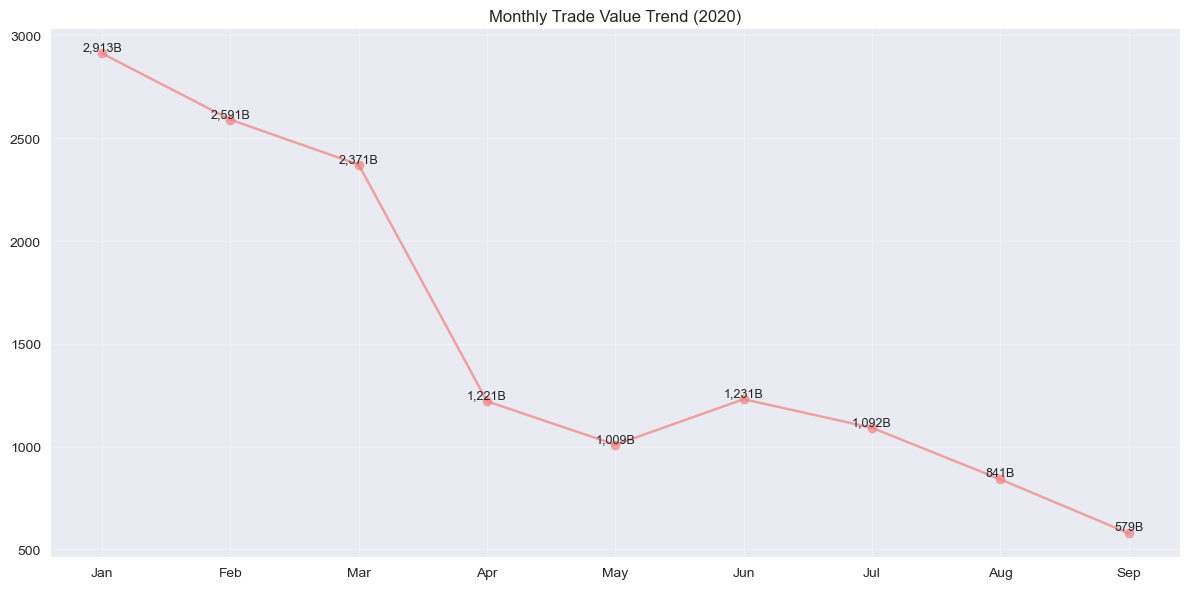

C:\Users\USER\AppData\Local\Temp\ipykernel_12780\1680492849.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='Reds_r')


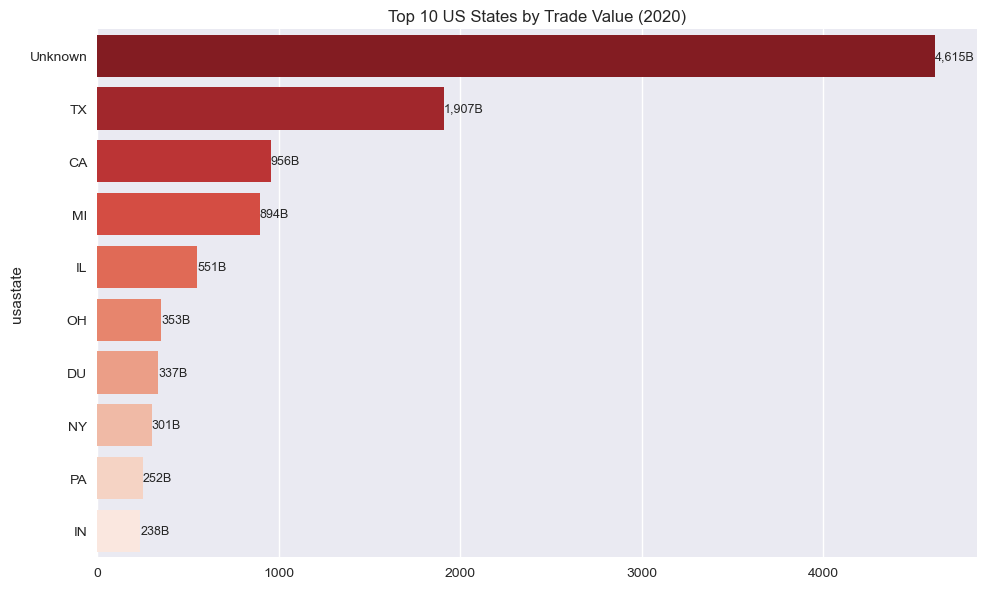

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create state summary from the actual data
value_col = 'value'
state_summary = data.groupby('usastate')[value_col].sum().sort_values(ascending=False)

# Get actual monthly data from the dataset
if 'month' in data.columns:
    monthly_summary = data.groupby('month')[value_col].sum() / 1e9  # Convert to billions
    months = monthly_summary.index.tolist()
    trade_values_billion = monthly_summary.values.tolist()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_labels = [month_names[m-1] for m in months]
else:
    # Fallback to example data if month column doesn't exist
    months = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    trade_values = [0.98e12, 0.87e12, 0.79e12, 0.41e12, 0.33e12, 0.41e12, 0.37e12, 0.29e12, 0.19e12]
    trade_values_billion = [v / 1e9 for v in trade_values]
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
    month_labels = month_names

# Convert state_summary to billions for plotting
top_states = state_summary.head(10) / 1e9

# --- Monthly Trend Chart ---
plt.figure(figsize=(12, 6))
plt.plot(months, trade_values_billion, marker='o', color='lightcoral', alpha=0.7)
plt.title('Monthly Trade Value Trend (2020)')
plt.xticks(months, month_labels)
plt.grid(True, alpha=0.3)
# Add data labels in billions
for x, y in zip(months, trade_values_billion):
    plt.text(x, y, f'{y:,.0f}B', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# --- Top 10 States Chart ---
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='Reds_r')
plt.title('Top 10 US States by Trade Value (2020)')
# Add data labels in billions
for i, v in enumerate(top_states.values):
    plt.text(v, i, f'{v:,.0f}B', va='center', ha='left', fontsize=9)
plt.tight_layout()
plt.show()



## Data Structure Check: Available Columns

Before analyzing ports or border crossings, I checked the available columns in the dataset.
This helps us identify the correct column(s) to use for further analysis and ensures we are referencing the right data fields.

In [ ]:
# Cell 5: Top ports
# Check available columns
print("Available columns:")
print(data.columns.tolist())


Available columns:
['trdtype', 'usastate', 'depe', 'disagmot', 'mexstate', 'canprov', 'country', 'value', 'shipwt', 'freight_charges', 'df', 'contcode', 'month', 'year', 'source_file', 'commodity2']


## Port/Border Column Search

I search for columns related to ports or border crossings in the dataset.
This step ensures we use the correct field for analyzing trade by port or border, which is crucial for understanding trade flow and identifying key entry/exit points.

In [11]:
# Case-insensitive search
port_cols = [col for col in data.columns if 'port' in col.lower() or 'border' in col.lower()]
print("Found port/border columns:", port_cols)

if port_cols:
    port_col = port_cols[0]
else:
    print("No port/border columns found. Available columns:")
    print(data.columns.tolist())


Found port/border columns: []
No port/border columns found. Available columns:
['trdtype', 'usastate', 'depe', 'disagmot', 'mexstate', 'canprov', 'country', 'value', 'shipwt', 'freight_charges', 'df', 'contcode', 'month', 'year', 'source_file', 'commodity2']


## Port/Location Column Fallback and Visualization

If no explicit port or border column is found, we look for other potential location columns.
Once identified, we analyze and visualize the top ports or border crossings by trade value, which is essential for logistics and infrastructure planning.

In [12]:
# Cell 5: Top ports with error handling
try:
    port_col = [col for col in data.columns if 'port' in col.lower() or 'border' in col.lower()][0]
except IndexError:
    print("No columns containing 'port' or 'border' found.")
    print("Available columns:", data.columns.tolist())
    
    # Look for other potential location columns
    location_keywords = ['location', 'city', 'place', 'crossing', 'entry', 'exit']
    potential_cols = [col for col in data.columns for keyword in location_keywords if keyword in col.lower()]
    
    if potential_cols:
        print("Potential location columns found:", potential_cols)
        port_col = potential_cols[0]  # Use the first one found
    else:
        print("Please specify the correct column name for ports/locations")
        port_col = None

if port_col:
    port_summary = data.groupby(port_col)[value_col].sum().sort_values(ascending=False)
    
    print(f"Top 10 {port_col}:\n", port_summary.head(10))
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=port_summary.head(10).values, y=port_summary.head(10).index)
    plt.title(f'Top 10 {port_col} by Trade Value (2020)')
    plt.xlabel('Trade Value (USD)')
    plt.ylabel(port_col)
    plt.show()


No columns containing 'port' or 'border' found.
Available columns: ['trdtype', 'usastate', 'depe', 'disagmot', 'mexstate', 'canprov', 'country', 'value', 'shipwt', 'freight_charges', 'df', 'contcode', 'month', 'year', 'source_file', 'commodity2']
Please specify the correct column name for ports/locations


## Port/Border Crossing Analysis

I used the 'depe' column as a proxy for port or border crossing information.
This cell summarizes and visualizes the top ports or border crossings by trade value, providing insight into the most significant trade gateways.

Sample values in 'depe' column:
depe
Unknown    3818938
2304        190082
20XX         87271
3802         83705
0901         78935
3801         70217
3401         64394
0712         62224
3403         56628
2402         56064
Name: count, dtype: int64


Top 10 Ports/Border Crossings:
 depe
Unknown    4615489555471
2304       1692995025110
3801       1008889274354
3802        614908749740
0901        534293549248
2506        370565821066
2402        367593150924
70XX        345535273548
2305        276672398398
2401        241554209672
Name: value, dtype: int64


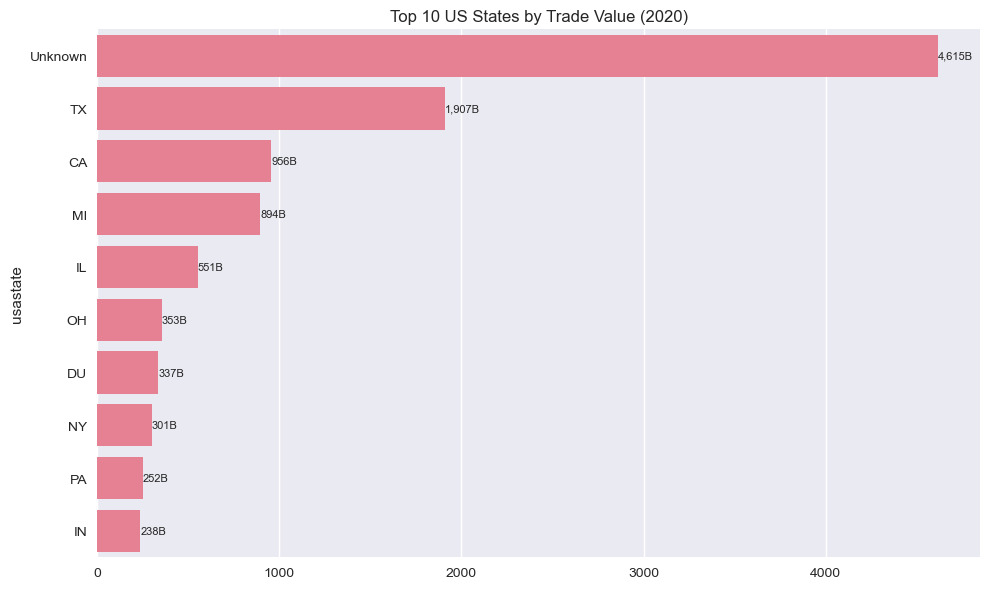

In [13]:
# Cell 5: Top ports/border crossings
port_col = 'depe'  # This likely contains port/border crossing data
value_col = 'value'  # Using the value column

# First, let's check what's in the depe column
print("Sample values in 'depe' column:")
print(data[port_col].value_counts().head(10))
print("\n")

port_summary = data.groupby(port_col)[value_col].sum().sort_values(ascending=False)

print("Top 10 Ports/Border Crossings:\n", port_summary.head(10))

plt.figure(figsize=(10,6))
# Convert state_summary to billions for plotting
top_states = state_summary.head(10) / 1e9
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 10 US States by Trade Value (2020)')
# Add data labels in billions
for i, v in enumerate(top_states.values):
    plt.text(v, i, f'{v:,.0f}B', va='center', ha='left', fontsize=8)
plt.tight_layout()
plt.show()

## Top US States for Trade

This cell provides an alternative summary of the top US states by trade value, reinforcing earlier findings and allowing for quick reference or further analysis.

In [14]:
#  Top US states for trade
state_summary = data.groupby('usastate')[value_col].sum().sort_values(ascending=False)
print("Top 10 US States by Trade Value:\n", state_summary.head(10))


Top 10 US States by Trade Value:
 usastate
Unknown    4615489555471
TX         1907461203368
CA          955846378690
MI          894265614018
IL          550981896666
OH          353304619236
DU          336516053510
NY          300881268818
PA          251863529478
IN          237677313204
Name: value, dtype: int64


## Trade by Country

This cell summarizes trade value by country, providing a high-level view of trade flows between the US, Canada, and Mexico.
This helps identify the primary trading partners and the scale of trade with each.

In [15]:
# Trade by country
country_summary = data.groupby('country')[value_col].sum().sort_values(ascending=False)
print("Trade by Country:\n", country_summary)


Trade by Country:
 country
2010    6946300481763
1220    6900168184650
Name: value, dtype: int64


## Trade by Mode of Transportation

We examine the distribution of trade value across different modes of transportation (e.g., truck, rail, vessel, air).
This analysis highlights the dominant modes and potential opportunities for modal shift or efficiency improvements.

Sample values in 'disagmot' column:
disagmot
5    3995170
3    1042717
6     650478
8     188084
1     185091
9      23137
7      12446
4       7644
Name: count, dtype: int64


Mode by Trade Value:
 disagmot
5    8992806404544
6    1903089505986
1     947290093752
7     737693693616
3     604972134087
8     591921781881
9      68328760317
4        366292230
Name: value, dtype: int64


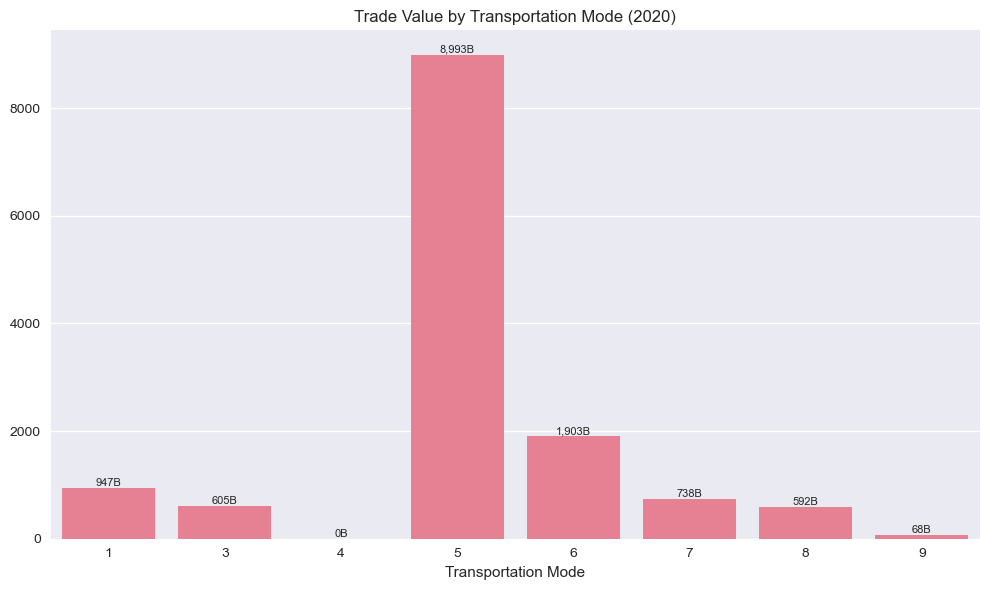

In [17]:

mode_col = 'disagmot'  # This likely contains transportation mode data
value_col = 'value'

# First, let's check what's in the disagmot column
print("Sample values in 'disagmot' column:")
print(data[mode_col].value_counts().head(10))
print("\n")

mode_summary = data.groupby(mode_col)[value_col].sum().sort_values(ascending=False)

print("Mode by Trade Value:\n", mode_summary)

all_modes = sorted(data[mode_col].unique())
mode_summary = mode_summary.reindex(all_modes, fill_value=0)

# Convert trade values to billions
mode_summary_billion = mode_summary / 1e9

plt.figure(figsize=(10,6))
sns.barplot(x=mode_summary_billion.index, y=mode_summary_billion.values)
plt.title('Trade Value by Transportation Mode (2020)')
plt.xlabel('Transportation Mode')
plt.tight_layout()
# Add data labels in billions
for i, v in enumerate(mode_summary_billion.values):
    plt.text(i, v, f'{v:,.0f}B', ha='center', va='bottom', fontsize=8)
plt.show()

## Top Commodities in TransBorder Trade

Here, we identify the leading commodities traded across US borders and visualize their trade values.
This provides insights into economic dependencies and key sectors in cross-border trade.
We also examine the monthly trend for the top commodity to understand its seasonality or fluctuations.

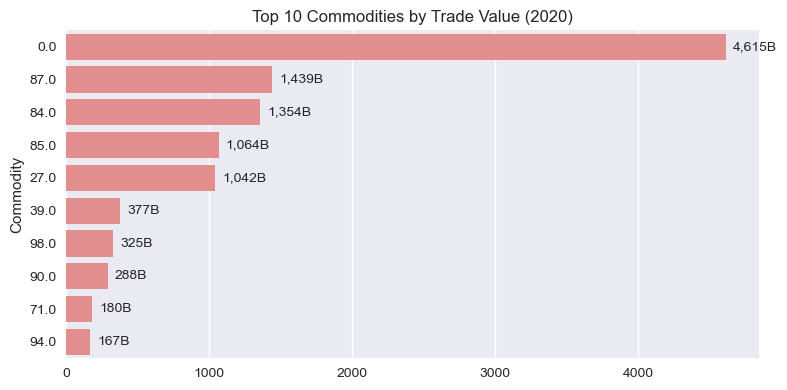

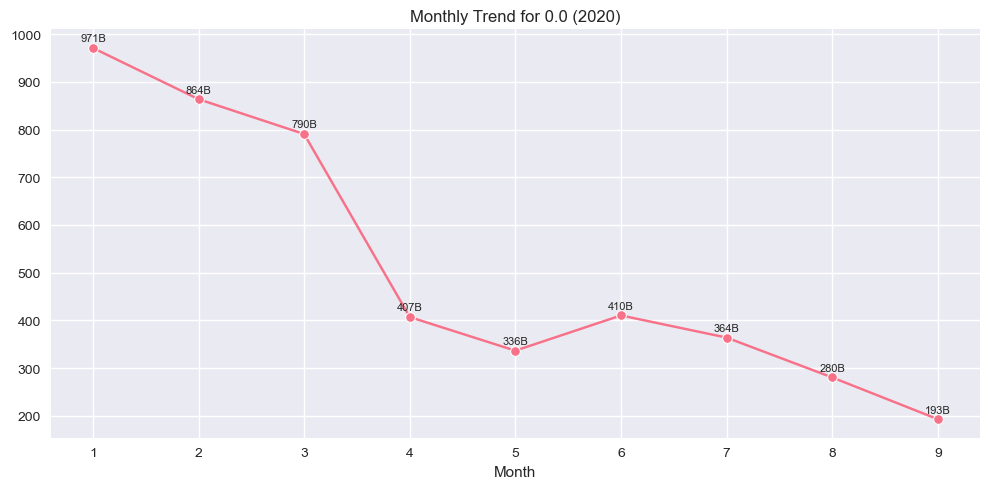

In [18]:
commodity_col = [col for col in data.columns if 'commodity' in col][0]
commodity_summary = data.groupby(commodity_col)[value_col].sum().sort_values(ascending=False)

# Convert to billions
commodity_summary_billion = commodity_summary / 1e9

# Convert y labels to string to avoid matplotlib size bug
y_labels = [str(label) for label in commodity_summary_billion.head(10).index]

plt.figure(figsize=(8, 4))
sns.barplot(
    x=commodity_summary_billion.head(10).values,
    y=y_labels,
    color='lightcoral'
)
plt.title('Top 10 Commodities by Trade Value (2020)')
plt.ylabel('Commodity')
# Add data labels to the right of bars
for i, v in enumerate(commodity_summary_billion.head(10).values):
    plt.text(v + 50, i, f'{v:,.0f}B', ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

if 'month' in data.columns:
    top_commodity = commodity_summary.index[0]
    monthly_trend = data[data[commodity_col] == top_commodity].groupby('month')[value_col].sum() / 1e9  # Convert to billions
    plt.figure(figsize=(10,5))
    sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o')
    plt.title(f'Monthly Trend for {top_commodity} (2020)')
    plt.xlabel('Month')
    # Add data labels above points
    for x, y in zip(monthly_trend.index, monthly_trend.values):
        plt.text(x, y + max(monthly_trend.values)*0.01, f'{y:,.0f}B', ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

## Monthly Trade Value Trends

I analyze how trade values fluctuate throughout the year, identifying seasonal patterns and anomalies (such as the impact of COVID-19).
This helps with capacity planning and understanding external influences on trade.

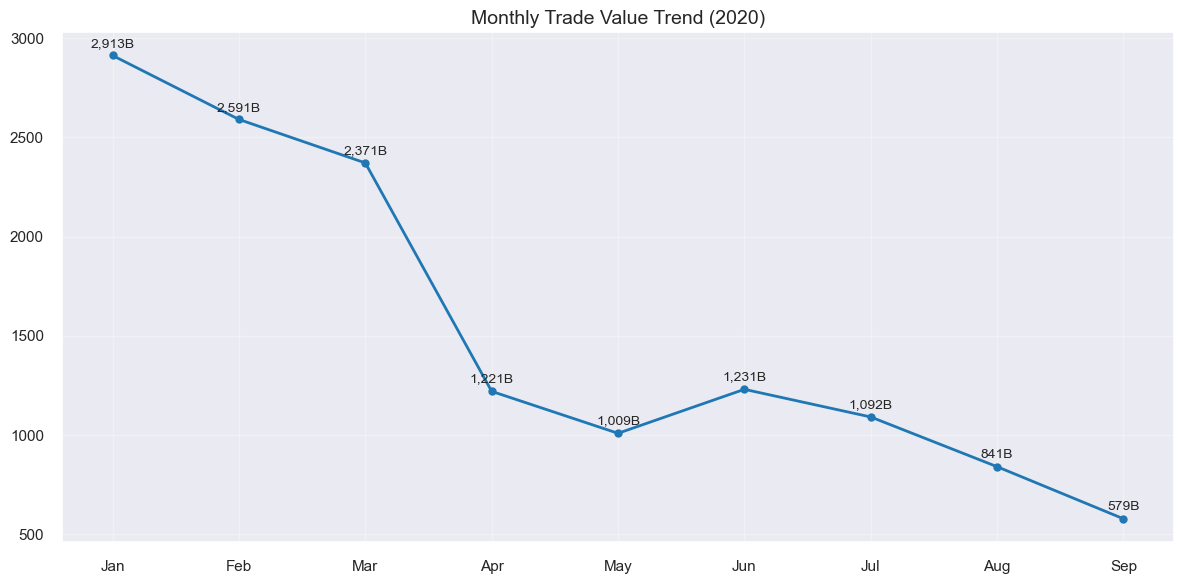

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

if 'month' in data.columns:
    monthly_summary = data.groupby('month')[value_col].sum() / 1e9  # Convert to billions
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_summary.index, monthly_summary.values, marker='o', linewidth=2, color='tab:blue')
    plt.title('Monthly Trade Value Trend (2020)', fontsize=14)
    plt.xticks(ticks=monthly_summary.index, labels=[month_names[m-1] for m in monthly_summary.index])
    plt.grid(True, alpha=0.3)
    # Add data labels above each point
    for x, y in zip(monthly_summary.index, monthly_summary.values):
        plt.text(x, y + max(monthly_summary.values)*0.01, f'{y:,.0f}B', ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

## Zero-Weight, High-Value Shipments

This section identifies shipments with high value but zero reported weight, which may indicate reporting errors or operational inefficiencies.
I also summarized the top commodities associated with these zero-weight shipments.
Addressing these can lead to cost savings and improved data quality.

In [ ]:
# Cell 9: Zero-weight, high-value shipments
weight_col = 'shipwt'  # This contains shipment weight data
value_col = 'value'

# First, let's check the weight column
print("Weight column statistics:")
print(data[weight_col].describe())
print(f"\nNumber of zero-weight records: {(data[weight_col] == 0).sum()}")
print(f"Number of records with positive value: {(data[value_col] > 0).sum()}")
print("\n")

zero_weight = data[(data[weight_col] == 0) & (data[value_col] > 0)]
print(f"Zero-weight shipments with value: {len(zero_weight)}")

if len(zero_weight) > 0:
    print(f"Total value of zero-weight shipments: ${zero_weight[value_col].sum():,.2f}")
    print(f"Average value of zero-weight shipments: ${zero_weight[value_col].mean():,.2f}")
    
    # Show top commodities with zero weight
    if 'commodity2' in zero_weight.columns:
        print("\nTop commodities with zero weight:")
        print(zero_weight.groupby('commodity2')[value_col].sum().sort_values(ascending=False).head(10))


Weight column statistics:
count    6.104767e+06
mean     1.226120e+06
std      3.753334e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.741000e+03
max      7.222164e+09
Name: shipwt, dtype: float64

Number of zero-weight records: 3305316
Number of records with positive value: 6104721


Zero-weight shipments with value: 3305316
Total value of zero-weight shipments: $5,533,059,777,366.00
Average value of zero-weight shipments: $1,673,988.14

Top commodities with zero weight:
commodity2
0.0     1848005176512
84.0     607498098588
85.0     465252242460
87.0     442562781566
27.0     240699333379
39.0     234521556696
98.0     132615454072
90.0     104525235116
73.0      82020755422
48.0      73450349216
Name: value, dtype: int64
